## Split into train and test set

In [1]:
import os

from datasets import load_from_disk
from transformers import Qwen2VLForConditionalGeneration, Qwen2_5_VLForConditionalGeneration, AutoProcessor
import torch
from qwen_vl_utils import process_vision_info
from PIL import Image
from datasets import load_dataset
import pandas as pd
print(os.getcwd())

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/alex/projects/ocr/scripts


In [3]:
os.getcwd()

'/home/alex/projects/ocr/scripts'

In [2]:
# Load the combined dataset from the processed directory
path = "../data/processed/dataset_p40"
data = load_from_disk(path)

print(f"Loaded dataset with {len(data)} cropped images.")


Loaded dataset with 133 cropped images.


In [5]:
# Split the dataset (80% train, 20% validation)
train_test_split = data.train_test_split(test_size=0.2)


In [6]:
# Print the properties of the train and test datasets
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

print("Train Dataset Properties:")
print(f"Number of examples: {len(train_dataset)}")
print(f"Features: {train_dataset.features}")

print("\nTest Dataset Properties:")
print(f"Number of examples: {len(test_dataset)}")
print(f"Features: {test_dataset.features}")


Train Dataset Properties:
Number of examples: 528
Features: {'text': Value(dtype='string', id=None), 'identifier': Value(dtype='string', id=None), 'image': Image(mode=None, decode=True, id=None)}

Test Dataset Properties:
Number of examples: 133
Features: {'text': Value(dtype='string', id=None), 'identifier': Value(dtype='string', id=None), 'image': Image(mode=None, decode=True, id=None)}


If desired, save the splitted dataset and push it to HuggingFace

In [ ]:

## Save the split datasets
#train_test_split.save_to_disk("data/processed/train_test_split")


### Training Qwen

In [ ]:
#pip install -r requirements.txt
from qwen_finetune import train_and_validate
import torch

In [ ]:
torch.cuda.empty_cache()
torch.cuda.reset_max_memory_allocated()

Define model name

In [ ]:
model_name = "Qwen/Qwen2-VL-2B-Instruct"
#qwen_model = "Qwen/Qwen2.5-VL-72B-Instruct"

Note: currently the train_and_validate functions work with HuggingFace datasets, not with local data. 

In [ ]:
train_and_validate(
    model_name=model_name,
    output_dir="results/p40_newindex",
    dataset_name="culturalheritagenus/Gongguan-OCR-p40",
    image_column="image",
    text_column="text",
    user_text="Convert this image to text",
    train_field="train",
    val_field="validation",
    num_accumulation_steps=2, #previously 2
    eval_steps=1000,
    max_steps=10000,
    train_batch_size=1,
    val_batch_size=1,
    device="cuda"
)

If desired, push the dataset and the trained parameters to HuggingFace

In [ ]:
## Push Data  to HuggingFace
# with open("tokens/token") as f:
#     token = f.read()
# train_test_split.push_to_hub("alexmozdzen/gongguan-ocr-1", token=token)
# #Push Model to HuggingFace
# from transformers import Qwen2VLForConditionalGeneration, AutoProcessor

# # Specify the directory where your model and processor are saved
# model_dir = 'output/final'  # Adjust this path if necessary

# # Load the model and processor
# model = Qwen2VLForConditionalGeneration.from_pretrained(model_dir)
# processor = AutoProcessor.from_pretrained(model_dir)
# repo_name = "mevsg/Qwen-Gongguan-OCR-v1"
#model.push_to_hub(repo_name,token=token,private=True)

# Testing the model

In [3]:
import torch
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
from transformers import Qwen2VLForConditionalGeneration, Qwen2_5_VLForConditionalGeneration, AutoProcessor
import torch
from qwen_vl_utils import process_vision_info
from PIL import Image
from datasets import load_dataset, load_from_disk
import pandas as pd
print(os.getcwd())
os.chdir("..") # change in the future
print(os.getcwd())
from src.train_test import *
from copy import deepcopy

/home/alex/projects/ocr/scripts
/home/alex/projects/ocr


# Load the fine-tuned model from Hugging Face Hub or from a local path

In [4]:
torch.cuda.empty_cache()
torch.cuda.reset_max_memory_allocated()

/usr/local/lib/python3.10/dist-packages/torch/cuda/memory.py:391: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(


In [ ]:
# From HugggingFace
#with open("data/tokens/token.txt") as f:
#    write_token = f.read()
#read_token = write_token
#model_name_p40 = 'culturalheritagenus/Gongguan-OCR-p40'
# Load the model and processor
#model_01_11 = Qwen2VLForConditionalGeneration.from_pretrained(
#    model_name_01_11,
#    token=read_token,
#    torch_dtype=torch.bfloat16,  # Use the appropriate torch dtype if needed
#    device_map='auto'            # Optional: automatically allocate model layers across devices
#)

In [7]:
os.getcwd()

'/home/alex/projects/ocr'

In [8]:

# Locally
model_p40 = Qwen2VLForConditionalGeneration.from_pretrained(
    "results/p40_newindex/final",
    device_map='auto'
)
# convert the model to half-precision floating point (FP16)
model_p40.half()
# Load the processor
processor = AutoProcessor.from_pretrained("results/p40_newindex/final")

Load the validation dataset (load_dataset is a huggingface function) and predict using the process image function

In [10]:
# from HF
#model_name_p40 = 'culturalheritagenus/Gongguan-OCR-p40'
#dataset_p40 = load_dataset(f"{model_name_p40}", split='validation')
# Locally
# Save the dataset from HF to disk
#dataset_p40.save_to_disk("../data/processed/dataset_p40")
dataset_p40 = load_from_disk("data/processed/dataset_p40")

In [52]:
dataset_p40[0]

{'text': '傅應瑞 楊南超 黄繼老 邹雨润 吳纉緒 黄心誠 楊汶水 黄長生 嚴衆官 袁滿官 林綢生 林光蔭 李霪官 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文 捐金壹拾文',
 'identifier': '32_41_0010_p010_r_6',
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1314x661>}

WER not appropriate in our case, since it considers words to be separated by whitespace, which is not true for Chinese text. For now continue with CER.

# Compute predictions and CER

Define message template with instructions by the user for the LLM

In [30]:
messages_template = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": None,  # Placeholder for image, to be updated
            },
            {"type": "text", "text": "Convert this image to text"},
            #{"type": "text", "text": "Convert this image to Chinese text and carefully consider when the image has multiple columns of text"},
        ],
    }
]

In [31]:
def process_image(image, model, messages_template):
    messages = deepcopy(messages_template)
    messages[0]["content"][0]["image"] = image
    text = processor.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    image_inputs, video_inputs = process_vision_info(messages)
    inputs = processor(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    )
    inputs = inputs.to("cuda")
    generated_ids = model.generate(**inputs, max_new_tokens=128)
    generated_ids_trimmed = [
        out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    return output_text[0]

In [43]:
def run_inference_and_calculate_cer(model_path, message_template, dataset):
    # Load the model and processor
    model = Qwen2VLForConditionalGeneration.from_pretrained(model_path, device_map="auto").half()
    processor = AutoProcessor.from_pretrained(model_path)

    results = []
    # Run inference on the dataset
    for item in dataset:
        prediction = process_image(item["image"], model, message_template)
        cer = compute_CER(item["text"], prediction, normalize=True)
        results.append({
            "ground_truth": item["text"],
            "num_lines": item["num_lines"],
            "prediction": prediction,
            "identifier": item["identifier"],
            "CER": cer
        })

    # Create DataFrame from results
    df = pd.DataFrame(results)

    return df


In [33]:
res = run_inference_and_calculate_cer("results/p40_newindex/final", messages_template, dataset_p40)

In [35]:
# Save predictions to CSV
#df_p40.to_csv('results/predictions/res.csv', index=False)
res

,ground_truth,prediction,identifier,CER
0,傅應瑞 楊南超 黄繼老 邹雨润 吳纉緒 黄心誠 楊汶水 黄長生 嚴衆官 袁滿官 林綢生 林光...,黄綌 老捐金臺拾文 黃心誠捐金臺拾文 楊汶水捐金臺拾文 鄧雨潤捐金臺拾文 傅應瑞捐金臺拾文 ...,32_41_0010_p010_r_6,0.682171
1,将厝尽归一人然後可已兹为汝公䖏一人得厝一人得銭當以拈阄为 修整厝氏出費錢叁拾餘文阮壽娘云他亦...,唯有而退 唯文愿乎不願奉日公堂事多毎暇及此若囬異日可行此法二比 李金娘供謂阮秀娘前合夥買厝壹...,12_21_0002_p002_r_3,0.842105
2,黄甲,黄甲,32_41_0004_p004_r_236,0.000000
3,雷珍蘭高根官在吧做遺囑字,雷珍瀾高根官在吧做遺嘱字,01_11_0006_p006_r_9,0.166667
4,張宙覌呌 許浪生 不到,張宙覌 呌 許浪生 不到,01_11_0001_p001_r,0.090909
...,...,...,...,...
128,寄在内淡囚内 三期不到请伽頭之令命達氏捉陳是,三期不到请伽倻王全命達氏提陳是 寄在内淡囧内,22_31_0002_p002_r_114,0.818182
129,34,4,12_21_0007_p007_r_3,0.500000
130,李寕義,李寕義,12_21_0002_p002_r_524,0.000000
131,陳馬援,陳馬援,22_31_0001_p001_r_36,0.000000


In [37]:
res["CER"].mean()

np.float64(0.43230091038372437)

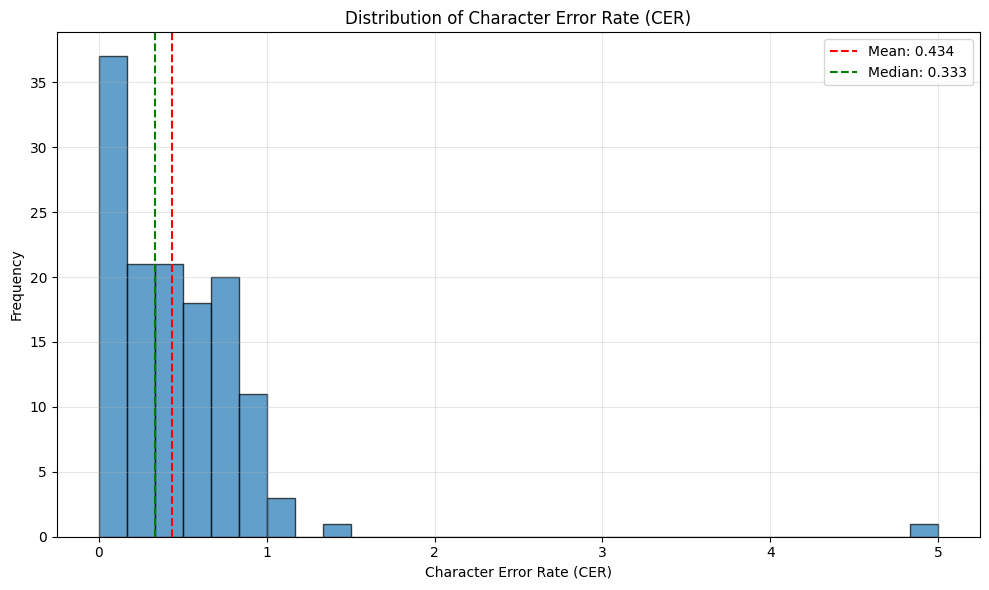

Total samples: 133
Mean CER: 0.4339
Median CER: 0.3333
Std CER: 0.5110
Min CER: 0.0000
Max CER: 5.0000


In [22]:


import matplotlib.pyplot as plt
import numpy as np

# Extract CER values from the results
cer_values = res['CER'].values

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(cer_values, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Character Error Rate (CER)')
plt.ylabel('Frequency')
plt.title('Distribution of Character Error Rate (CER)')
plt.grid(True, alpha=0.3)

# Add some statistics
mean_cer = np.mean(cer_values)
median_cer = np.median(cer_values)
plt.axvline(mean_cer, color='red', linestyle='--', label=f'Mean: {mean_cer:.3f}')
plt.axvline(median_cer, color='green', linestyle='--', label=f'Median: {median_cer:.3f}')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total samples: {len(cer_values)}")
print(f"Mean CER: {mean_cer:.4f}")
print(f"Median CER: {median_cer:.4f}")
print(f"Std CER: {np.std(cer_values):.4f}")
print(f"Min CER: {np.min(cer_values):.4f}")
print(f"Max CER: {np.max(cer_values):.4f}")




In [24]:
# Extract the first entry
first_entry = res.iloc[3]

# Original texts
original_gt_text = first_entry['ground_truth']
original_pred_text = first_entry['prediction']

# Add option to skip normalization
skip_normalization = True  # Set to True to skip normalization

if not skip_normalization:
    # Normalization steps
    normalized_gt_text = re.sub(r'\s+', ' ', unicodedata.normalize('NFKC', str(original_gt_text))).strip()
    normalized_pred_text = re.sub(r'\s+', ' ', unicodedata.normalize('NFKC', str(original_pred_text))).strip()
else:
    # Use original texts without normalization
    normalized_gt_text = str(original_gt_text)
    normalized_pred_text = str(original_pred_text)

# Calculate CER

char_distance = levenshtein_distance(list(normalized_gt_text), list(normalized_pred_text))
cer = char_distance / len(normalized_gt_text) if len(normalized_gt_text) > 0 else 0

# Print results
print("First Entry Analysis:")
print(f"Identifier: {first_entry['identifier']}")
print(f"Original GT: {original_gt_text}")
print(f"Normalized GT: {normalized_gt_text}")
print(f"Original Pred: {original_pred_text}")
print(f"Normalized Pred: {normalized_pred_text}")
print(f"Char Distance: {char_distance}")
print(f"CER: {cer}")

First Entry Analysis:
Identifier: 01_11_0006_p006_r_9
Original GT: 雷珍蘭高根官在吧做遺囑字
Normalized GT: 雷珍蘭高根官在吧做遺囑字
Original Pred: 雷珍 蘭高根官在吧 做遗嘱字
Normalized Pred: 雷珍 蘭高根官在吧 做遗嘱字
Char Distance: 4
CER: 0.3333333333333333


In [ ]:
display_results(df_p40, num_examples= 2)

In [38]:
import pandas as pd
from collections import Counter

half_sample_size = round(res.shape[0] / 2)

# Function to analyze the DataFrame for highest and lowest CER values
#def analyze_cer(res):
    # Sort by CER
sorted_df = res.sort_values(by='CER', ascending=False)
# Get top 10 and bottom 10 entries
top_10 = sorted_df.tail(half_sample_size).dropna()
bottom_10 = sorted_df.head(half_sample_size).dropna()

# Analyze Chinese symbols in top and bottom 10
top_symbols = Counter(''.join(top_10['ground_truth']))
bottom_symbols = Counter(''.join(bottom_10['ground_truth']))
# Get most common symbols
top_common_symbols = top_symbols.most_common(10)
bottom_common_symbols = bottom_symbols.most_common(10)


# Analyze prediction lengths
top_lengths = top_10['prediction'].apply(len)
bottom_lengths = bottom_10['prediction'].apply(len)

# Print analysis
print("Top 10 CER Analysis:")
print("Most common symbols:", top_common_symbols)
print("Prediction lengths:", top_lengths.describe())

print("\nBottom 10 CER Analysis:")
print("Most common symbols:", bottom_common_symbols)
print("Prediction lengths:", bottom_lengths.describe())

# Additional analysis suggestions
# - Compare CER with prediction length
# - Visualize CER distribution
# - Analyze correlation between CER and specific symbols


Top 10 CER Analysis:
Most common symbols: [(' ', 52), ('覌', 26), ('呌', 21), ('甲', 16), ('陳', 13), ('不', 11), ('到', 9), ('當', 9), ('林', 8), ('事', 8)]
Prediction lengths: count    66.000000
mean      9.515152
std      14.198854
min       1.000000
25%       3.000000
50%       5.000000
75%       8.000000
max      87.000000
Name: prediction, dtype: float64

Bottom 10 CER Analysis:
Most common symbols: [(' ', 224), ('文', 85), ('拾', 68), ('錢', 60), ('壹', 55), ('金', 44), ('捐', 39), ('不', 36), ('一', 36), ('五', 32)]
Prediction lengths: count     65.000000
mean      36.800000
std       42.601056
min        1.000000
25%        5.000000
50%       14.000000
75%       61.000000
max      134.000000
Name: prediction, dtype: float64


In [26]:
cases_with_spaces = bottom_10[bottom_10['ground_truth'].str.contains(' ')]
                               #|bottom_10['prediction'].str.contains(' ')]
    
# Extract two cases
cases_with_spaces.iloc[1, ]


ground_truth    陳德蘭供谓李寕二前去山枋壁磚灰鉄对除外尚 長去銭叁拾四文弍犮五方屡讨不还李寕二供谓欠 德蘭之...
prediction      德蘭 之子 有之 呌若 之 多 列 呌谕 二 比在外 会 算 长古自叁拾四文 武文 五方 属...
identifier                                    32_41_0001_p001_r_6
CER                                                      1.063492
Name: 5, dtype: object

In [39]:
top_10

,ground_truth,prediction,identifier,CER
46,削視 人 鄭顧覌 張玉郎,削人鄭顧覌 視張玉郎,12_21_0009_p009_r_12,0.333333
36,吳度覌,吳慶覌,01_11_0008_p008_r_25,0.333333
97,削視 人 黄百合 張宙覌,削人黄百合 視張宙覌,32_41_0009_p009_r_8,0.333333
124,鄭春覌 二期 不到,鄭春覌 不到,12_21_0005_p005_r_15,0.333333
114,李寧二,李寕二,22_31_0008_p008_r_3,0.333333
...,...,...,...,...
105,邹富覌 呌,邹富覌 呌,12_21_0004_p004_r_9,0.000000
123,陳端舍呌,陳端舍呌,22_31_0007_p007_r_15,0.000000
119,22,22,12_21_0001_p001_r,0.000000
130,李寕義,李寕義,12_21_0002_p002_r_524,0.000000


In [40]:
bottom_10   

,ground_truth,prediction,identifier,CER
45,46,47 58,22_31_0003_p003_r_322,2.000000
107,無再𨂻前轍列𦤼赦宥不究 寅突入卧房毆打是以有與他互毆懇𦤼開恩赦宥斷,寅interop序殴打是已有其他互殴案 臺间恩叔審影 身再蹈前輓列表救寘不究,12_21_0007_p007_r,1.151515
62,又囬家之信係林次老所寄祈为審实 林盛为前年陳𤆬有欠去貨銭供详前期四月十六日,林盛为前年陈焦有欠李货钱供详前期四月十六日 文回家之后信橡林次老听寄说为审实,32_41_0003_p003_r_3,1.027027
56,伊家傭工即将鞋籠物器交寄寜義代収工竣之日工錢既已 向寕義取讨所寄鞋籠々内有鞋刀三枝釘槌壹枝鞋...,百餘條釁鑼土枝紳笏頭裈半條-ln切刀三枝鑽仔八枝剪刀一枝 伊家僱工即將鞋籠物罌交寄寧義代收工...,12_21_0002_p002_r_16,0.951220
120,至今不還本日對舍侄還來錢叁拾文貳鈸除外尚欠去錢叁拾文貳 湯新供謂去歲六月十一日葉亞六去錢陸拾...,至今不還奉日对金赃还赃日叁拾又口径除往外尚欠去日叁拾又口径 萬壹六乞限壹年六月清楚 溝新供渭...,01_11_0005_p005_r_8,0.906667
...,...,...,...,...
25,三阄 黄甲 林甲,三圍 黃甲 林,12_21_0003_p003_r_590,0.375000
16,王興廣供謂鄭旺伯前期在公堂坐欠去錢陸拾柒文貳鈸後他,王興廣供謂鄭旺均前期在庲堂坐欠李子誥拾得文武成後地,01_11_0005_p005_r_7,0.360000
121,圡庫内案奪为李璉一事存案,去庫内案奪為李連一案存案,32_41_0005_p005_r_7,0.333333
92,陳寬覌,陳寕覌,22_31_0007_p007_r_16,0.333333


In [74]:
print(top_lengths)
top_10

82     1
83     3
74     3
79     8
113    3
105    5
123    4
119    2
130    3
131    3
Name: prediction, dtype: int64


,ground_truth,prediction,identifier,CER
82,5,5,01_11_0003_p003_r_2,0.0
83,陳約覌,陳約覌,22_31_0005_p005_r_5,0.0
74,鄭旺伯,鄭旺伯,01_11_0002_p002_r_81,0.0
79,陳甲 楊甲 當事,陳甲 楊甲 當事,22_31_0009_p009_r_13,0.0
113,朱金覌,朱金覌,32_41_0008_p008_r_8,0.0
105,邹富覌 呌,邹富覌 呌,12_21_0004_p004_r_9,0.0
123,陳端舍呌,陳端舍呌,22_31_0007_p007_r_15,0.0
119,22,22,12_21_0001_p001_r,0.0
130,李寕義,李寕義,12_21_0002_p002_r_524,0.0
131,陳馬援,陳馬援,22_31_0001_p001_r_36,0.0


In [41]:
def plot_prediction_lengths_histogram(df, num_predictions=10):
    # Sort by CER
    sorted_df = df.sort_values(by='CER', ascending=True)
    
    # Get top and bottom entries
    top_entries = sorted_df.head(num_predictions)
    bottom_entries = sorted_df.tail(num_predictions)
    
    # Analyze prediction lengths
    top_lengths = top_entries['prediction'].apply(len)
    bottom_lengths = bottom_entries['prediction'].apply(len)
    
    # Determine the range for the bins
    min_length = min(top_lengths.min(), bottom_lengths.min())
    max_length = max(top_lengths.max(), bottom_lengths.max())
    bins = range(min_length, max_length + 1)

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(top_lengths, bins=bins, alpha=0.5, label='Top CER Predictions', color='red')
    plt.hist(bottom_lengths, bins=bins, alpha=0.5, label='Bottom CER Predictions', color='blue')
    plt.xlabel('Prediction Length')
    plt.ylabel('Frequency')
    plt.title('Histogram of Prediction Lengths')
    plt.legend(loc='upper right')
    plt.show()

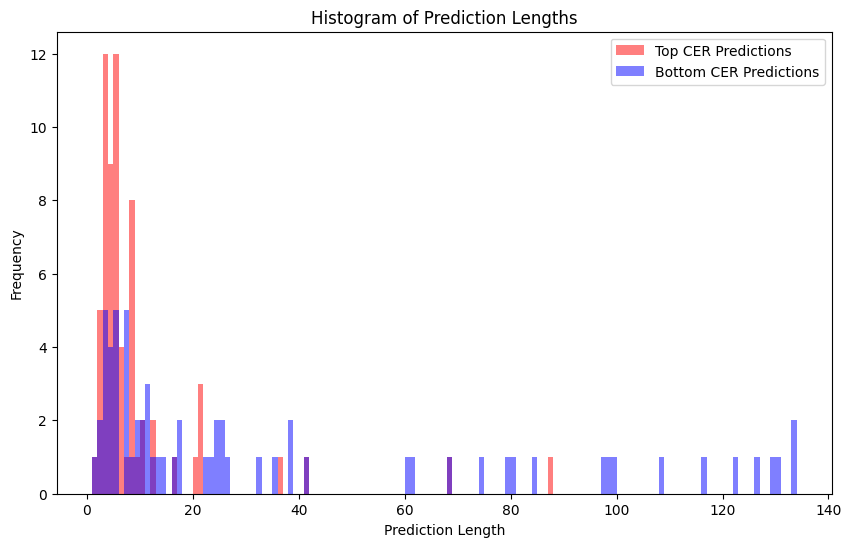

In [42]:
plot_prediction_lengths_histogram(res, num_predictions=round(res.shape[0]/2)) 